In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# **Première partie**


## Loading the Data

In [216]:
rot_tom_rev_path_1 = "../data/raw/rotten_tomatoes_critic_reviews_1.csv"
rot_tom_rev_path_0 = "../data/raw/rotten_tomatoes_movie_reviews_0.csv"

rot_tom_movie_path_0 = "../data/raw/rotten_tomatoes_movies_0.csv"
rot_tom_movie_path_1 = "../data/raw/rotten_tomatoes_movies_1.csv"


movie_info_path_2 = '../data/raw/movie_info_2.csv'

rot_tom_movie_path_3 = '../data/raw/rotten_tomatoes_top_movies_3.csv'


movie_metadata = "../data/raw/movie.metadata.tsv"
character_metadata = '../data/raw/character.metadata.tsv'





## Put the csvs' in dataFrames

In [217]:
movies_df_2 = pd.read_csv(movie_info_path_2)


In [218]:
movies_df_0 = pd.read_csv(rot_tom_movie_path_0)
movies_df_1 = pd.read_csv(rot_tom_movie_path_1)

In [219]:
reviews_df_0 = pd.read_csv(rot_tom_rev_path_0)
reviews_df_1 = pd.read_csv(rot_tom_rev_path_1)

In [220]:
movies_df_3 = pd.read_csv(rot_tom_movie_path_3)
movies_df_3 = movies_df_3.loc[:, ~movies_df_3.columns.str.contains('^Unnamed')]

## Details of the content:


# Analyse des Datasets Rotten Tomatoes Movies & Reviews

Ce notebook explore deux datasets contenant des informations sur les critiques et les films Rotten Tomatoes. 

##  **Liens et Source**
- **Source des données :** [Kaggle - Massive Rotten Tomatoes Movies & Reviews](https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews?select=rotten_tomatoes_movies.csv)
- **Fichiers disponibles :**
  - `rotten_tomatoes_movie_reviews_0.csv`
  - `rotten_tomatoes_movies_0.csv`

---

##  **Structure des Datasets**

### 1️⃣ **Dataset des Critiques** (`rotten_tomatoes_movie_reviews_0.csv`)

Ce dataset contient des informations sur les critiques des films.

| **Colonne**        | **Description**                                                                                 |
|---------------------|-----------------------------------------------------------------------------------------------|
| `id`               | Identifiant unique pour chaque film (correspond à l'identifiant dans le dataset des films).     |
| `reviewId`         | Identifiant unique pour chaque critique de film.                                               |
| `creationDate`     | Date de publication de la critique.                                                           |
| `criticName`       | Nom du critique ayant écrit la critique.                                                      |
| `isTopCritic`      | Indique si le critique est considéré comme un "Top Critic" (`True` ou `False`).                |
| `originalScore`    | Score attribué par le critique.                                                               |
| `reviewState`      | Statut de la critique (e.g., `fresh`, `rotten`).                                              |
| `publicatioName`   | Nom de la publication où la critique a été publiée.                                           |
| `reviewText`       | Texte complet de la critique.                                                                 |
| `scoreSentiment`   | Sentiment associé au score de la critique (e.g., `positive`, `negative`, `neutral`).           |

---

### 2️⃣ **Dataset des Films** (`rotten_tomatoes_movies_0.csv`)

Ce dataset contient des informations détaillées sur les films.

| **Colonne**             | **Description**                                                                       |
|--------------------------|---------------------------------------------------------------------------------------|
| `id`                    | Identifiant unique pour chaque film.                                                  |
| `title`                 | Titre du film.                                                                        |
| `audienceScore`         | Score moyen attribué par les spectateurs.                                              |
| `tomatoMeter`           | Pourcentage de critiques positives par des critiques professionnels.                   |
| `rating`                | Classification d'âge du film (e.g., `G`, `PG`, `PG-13`, `R`).                         |
| `ratingContents`        | Raisons liées à la classification d'âge.                                              |
| `releaseDateTheaters`   | Date de sortie du film au cinéma.                                                     |
| `releaseDateStreaming`  | Date de disponibilité en streaming.                                                   |
| `runtimeMinutes`        | Durée du film en minutes.                                                             |
| `genre`                 | Genre(s) du film.                                                                     |

---




In [231]:
movies_df_0.head(1)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN


In [232]:

reviews_df_0.head(1)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...


In [229]:
movies_df_1.head(1)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [222]:
reviews_df_1.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


In [230]:
movies_df_3.head(1)

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,...,"Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",http://www.rottentomatoes.com/m/black_panther_...


In [224]:

character_metadata = pd.read_csv(character_metadata, sep='\t', header=None)

In [225]:
movie_metadata = pd.read_csv(movie_metadata, sep='\t', header=None)

## Original dataset

In [227]:
movie_metadata.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Release_date', 'Box_office_revenue', 
              'Runtime', 'Languages', 'Countries', 'Genres']



character_metadata.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Release_date', 'Character_name', 
                              'Actor_dob', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 
                              'Actor_name', 'Actor_age_at_release', 'Freebase_char_actor_map_ID', 
                              'Freebase_char_ID', 'Freebase_actor_ID']



In [129]:
movie_metadata.head(2)


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Box_office_revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


In [130]:
character_metadata.head(2)

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date,Character_name,Actor_dob,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_release,Freebase_char_actor_map_ID,Freebase_char_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4


## Keeping data about comedy

In [228]:
# Filtrer pour garder les films dont le genre contient "comedy"
comedy_movies_0 = movies_df_0[movies_df_0['genre'].str.contains("comedy", case=False, na=False)]

comedy_movies_0.head(2)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
6,malta-con-huevo-scrambled-beer,Scrambled Beer,55.0,NaN,NaN,NaN,NaN,2015-10-05,88.0,Comedy,Spanish,Cristobal Valderrama,Cristobal Valderrama,NaN,NaN,NaN


drama                 8244
romance               4767
kids & family         1523
adventure             1488
action                1354
horror                1262
animation             1252
musical               1024
fantasy                952
mystery & thriller     925
Name: count, dtype: int64


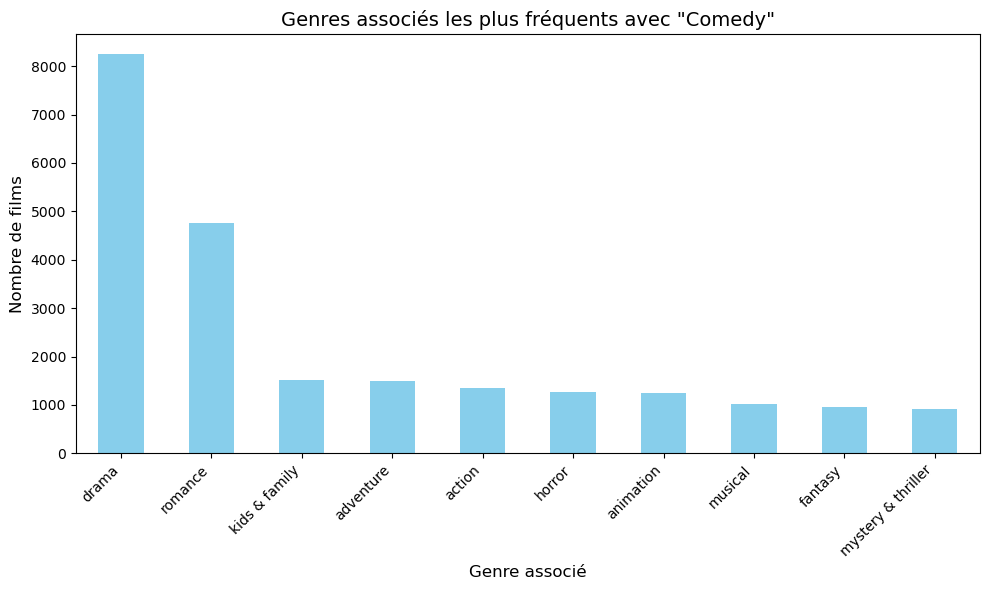

In [190]:
associated_genres = []

for genre_list in comedy_movies_0['genre'].str.lower().str.split(',\s*'):
    # Ajouter tous les genres sauf "comedy" à la liste temporaire
    associated_genres.extend([genre for genre in genre_list if genre != "comedy"])

# Créer une série pour compter la fréquence de chaque genre associé
associated_genre_counts = pd.Series(associated_genres).value_counts()

# Afficher les 10 genres associés les plus fréquents
print(associated_genre_counts.head(10))

# Créer un graphique pour visualiser les genres associés les plus fréquents
plt.figure(figsize=(10, 6))
associated_genre_counts.head(10).plot(kind='bar', color='skyblue')

# Ajouter un titre et des labels
plt.title('Genres associés les plus fréquents avec "Comedy"', fontsize=14)
plt.xlabel('Genre associé', fontsize=12)
plt.ylabel('Nombre de films', fontsize=12)

# Afficher le graphique
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [197]:
comedy_movies_0.head(2)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
6,malta-con-huevo-scrambled-beer,Scrambled Beer,55.0,NaN,NaN,NaN,NaN,2015-10-05,88.0,Comedy,Spanish,Cristobal Valderrama,Cristobal Valderrama,NaN,NaN,NaN


In [192]:
# Calculer le nombre de films qui sont uniquement "Comedy"
just_comedy_count = comedy_movies_0[comedy_movies_0['genre'].str.strip().str.lower() == "comedy"].shape[0]

# Calculer le nombre de films "Comedy" associés à d'autres genres
associated_genres_count = comedy_movies_0.shape[0] - just_comedy_count

# Calculer les proportions en pourcentage
total_comedy_movies = comedy_movies_0.shape[0]
just_comedy_proportion = just_comedy_count / total_comedy_movies * 100
associated_genres_proportion = associated_genres_count / total_comedy_movies * 100

# Afficher les résultats
print(f"Proportion de films uniquement 'Comedy': {just_comedy_proportion:.2f}%")
print(f"Proportion de films 'Comedy' associé à d'autres genres: {associated_genres_proportion:.2f}%")

Proportion de films uniquement 'Comedy': 38.28%
Proportion de films 'Comedy' associé à d'autres genres: 61.72%


Analyse of the "review" dataset:

In [193]:
initial_size = reviews_df_0.shape[0]
print(f"Taille de reviews_df avant le filtrage : {initial_size} lignes")

Taille de reviews_df avant le filtrage : 1444963 lignes


In [203]:
comedy_movies_1 = movies_df_1[movies_df_1['genres'].str.contains("comedy", case=False, na=False)]

comedy_movies_1.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


## Merge btw review 0 and comedy 0

In [211]:
merged_df_0 = pd.merge(comedy_movies_0, reviews_df_0, on='id', how='inner')

In [214]:
merged_df_0.head(2)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,the_last_gentleman,The Last Gentleman,NaN,NaN,NaN,NaN,NaN,NaN,80.0,Comedy,...,2684805,2020-04-21,Meyer Levin (Patterson Murphy),False,NaN,rotten,Esquire Magazine,...so crammed with sentimental rubbish that it...,NEGATIVE,https://classic.esquire.com/article/1934/10/1/...
1,the_last_gentleman,The Last Gentleman,NaN,NaN,NaN,NaN,NaN,NaN,80.0,Comedy,...,2607721,2019-07-23,Ann Ross,False,NaN,fresh,Maclean's Magazine,The whole family can go to The Last Gentleman ...,POSITIVE,https://archive.macleans.ca/article/1934/9/15/...


In [215]:


# Calculer et afficher la taille de reviews_df après le filtrage
filtered_size = merged_df_0.shape[0]
print(f"Taille de reviews_df après le filtrage : {filtered_size} lignes")

Taille de reviews_df après le filtrage : 437654 lignes


## filtering fields

# Merge btw comedy 1 and review 1

In [204]:
merged_df_1 = pd.merge(movies_df_1, reviews_df_1, on='rotten_tomatoes_link', how='inner')

In [205]:
merged_df_1.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


## Audiance vs critic

## 2 and 3

In [143]:
movies_df_2.head()

,title,url,release_date,critic_score,audience_score
0,Love Story,https://www.rottentomatoes.com/m/love_story,"Released Dec 16, 1970",63%,75%
1,Airport,https://www.rottentomatoes.com/m/airport,"Released Apr 5, 1970",75%,54%
2,M*A*S*H,https://www.rottentomatoes.com/m/mash,"Released Jan 30, 1970",84%,83%
3,Patton,https://www.rottentomatoes.com/m/patton,"Released Jan 25, 1970",91%,93%
4,The Aristocats,https://www.rottentomatoes.com/m/the_aristocats,1970,NaN,NaN


In [207]:
movies_df_2['id'] = movies_df_2['url'].apply(lambda x: x.split('/')[-1])

# Afficher les premières lignes pour vérifier
movies_df_2.head()

,title,url,release_date,critic_score,audience_score,id
0,Love Story,https://www.rottentomatoes.com/m/love_story,"Released Dec 16, 1970",63%,75%,love_story
1,Airport,https://www.rottentomatoes.com/m/airport,"Released Apr 5, 1970",75%,54%,airport
2,M*A*S*H,https://www.rottentomatoes.com/m/mash,"Released Jan 30, 1970",84%,83%,mash
3,Patton,https://www.rottentomatoes.com/m/patton,"Released Jan 25, 1970",91%,93%,patton
4,The Aristocats,https://www.rottentomatoes.com/m/the_aristocats,1970,NaN,NaN,the_aristocats


!!!!! Pas de lien avec le genre

In [155]:
movies_df_3.head(3)

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,...,"Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",http://www.rottentomatoes.com/m/black_panther_...
1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,...,"Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",http://www.rottentomatoes.com/m/avengers_endgame
2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,...,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P...",http://www.rottentomatoes.com/m/mission_imposs...


In [163]:
num_rows = movies_df_3.shape[0]
print(num_rows)

1610


In [156]:
comedy_movies_3_df = movies_df_3[movies_df_3['type'].str.contains("comedy", case=False, na=False)]

In [159]:
comedy_movies_3_df.head(3)

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
400,It Happened One Night,1934,"In Frank Capra's acclaimed romantic comedy, sp...",99,93.0,Capturing its stars and director at their fine...,96,"25,000+",Comedy,NaN,...,NaN,"Apr 16, 2012",NaN,1h 45m,Columbia Pictures Corporation,Mono,"35mm, Flat (1.37:1)",NaN,"Claudette Colbert, Clark Gable, Walter Connoll...",http://www.rottentomatoes.com/m/it_happened_on...
401,Toy Story 4,2019,"Woody, Buzz Lightyear and the rest of the gang...",97,94.0,"Heartwarming, funny, and beautifully animated,...",450,"50,000+ Verified",Comedy,G,...,"Jun 21, 2019 wide","Oct 1, 2019",$434.0M,1h 40m,Pixar Animation Studios,"DTS, Dolby Digital, Dolby Atmos",Scope (2.35:1),Pixar,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale, ...",http://www.rottentomatoes.com/m/toy_story_4
402,Lady Bird,2017,A teenager (Saoirse Ronan) navigates a loving ...,99,79.0,Lady Bird delivers fresh insights about the tu...,394,"10,000+",Comedy,R (Language|Brief Graphic Nudity|Sexual Conten...,...,"Nov 22, 2017 wide","Feb 13, 2018",$48.9M,1h 34m,"Scott Rudin Productions, A24",Dolby Digital,Flat (1.85:1),NaN,"Saoirse Ronan, Laurie Metcalf, Timothée Chalam...",http://www.rottentomatoes.com/m/lady_bird


In [160]:
genre_counts = comedy_movies_3_df.groupby('type').size()

# Afficher les résultats
print(genre_counts)

type
Comedy    100
dtype: int64
